### Import Libraries and Load the Dataset

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable plots inline
%matplotlib inline

# 2. Load the dataset
df = pd.read_csv('../data/raw/train.csv')

# 3. View first few rows
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


### Check Basic Information

In [2]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and null values
df.info()

# Check for missing values
df.isnull().sum()


Shape of dataset: (456548, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

### Basic Descriptive Statistics

In [3]:
df.describe()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


### Target Variable Distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


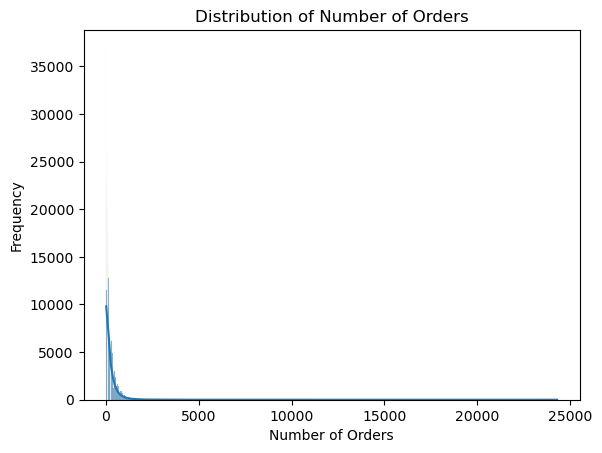

In [4]:
sns.histplot(df['num_orders'], kde=True)
plt.title("Distribution of Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.show()


### Price vs Orders

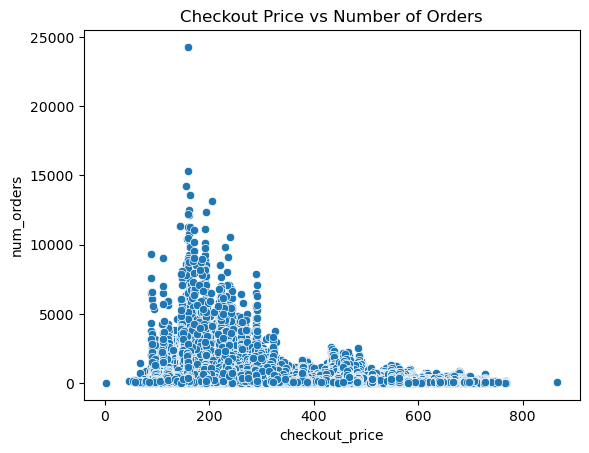

In [5]:
sns.scatterplot(data=df, x='checkout_price', y='num_orders')
plt.title("Checkout Price vs Number of Orders")
plt.show()


### Promo Flags Impact

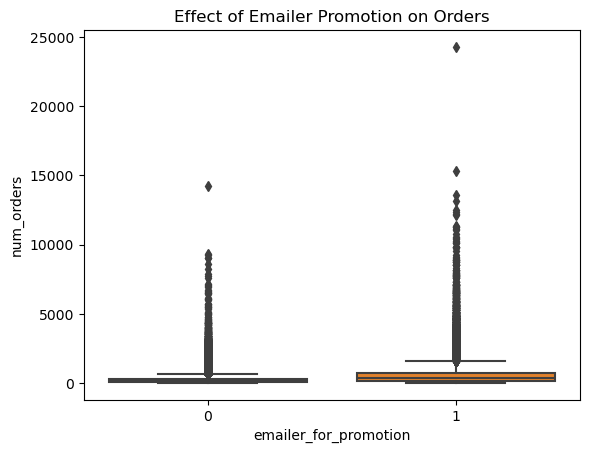

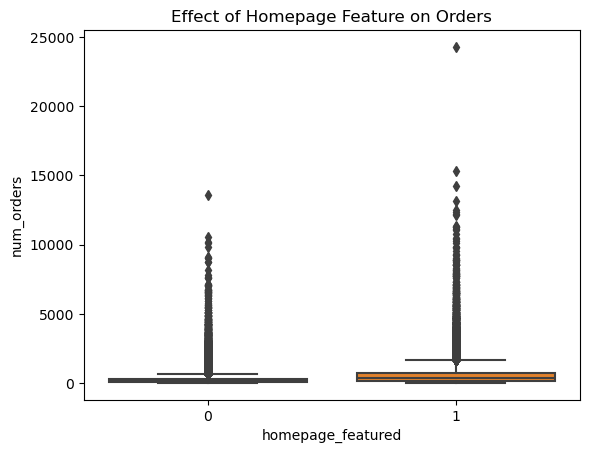

In [6]:
# Emailer promo
sns.boxplot(x='emailer_for_promotion', y='num_orders', data=df)
plt.title("Effect of Emailer Promotion on Orders")
plt.show()

# Homepage featured
sns.boxplot(x='homepage_featured', y='num_orders', data=df)
plt.title("Effect of Homepage Feature on Orders")
plt.show()


### Correlation Matrix

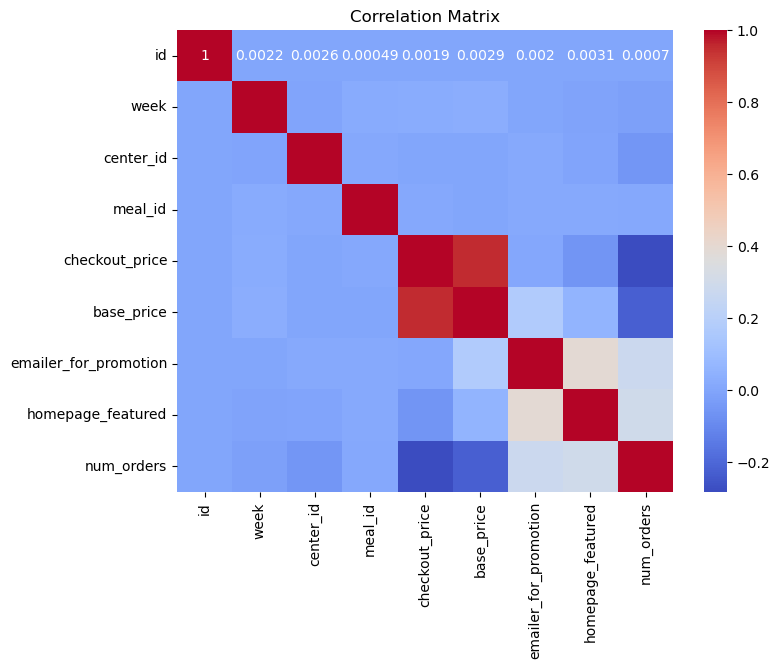

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Discount & Discount Percentage

In [8]:
# Discount amount
df['discount'] = df['base_price'] - df['checkout_price']

# Discount percentage
df['discount_pct'] = df['discount'] / df['base_price']
df['discount_pct'] = df['discount_pct'].fillna(0)


### Promotion Effect Combo

In [9]:
# Promo power (1 if any promo is active)
df['any_promo'] = ((df['emailer_for_promotion'] == 1) | (df['homepage_featured'] == 1)).astype(int)


### Meal Popularity (Rolling Demand)

In [10]:
# Average number of orders per meal
meal_popularity = df.groupby('meal_id')['num_orders'].mean().rename('meal_popularity')
df = df.merge(meal_popularity, on='meal_id', how='left')


### Center Popularity

In [11]:
center_popularity = df.groupby('center_id')['num_orders'].mean().rename('center_popularity')
df = df.merge(center_popularity, on='center_id', how='left')


### Preview Updated DataFrame

In [12]:
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,discount,discount_pct,any_promo,meal_popularity,center_popularity
0,1379560,1,55,1885,136.83,152.29,0,0,177,15.46,0.101517,0,752.456365,163.475709
1,1466964,1,55,1993,136.83,135.83,0,0,270,-1.00,-0.007362,0,598.853544,163.475709
2,1346989,1,55,2539,134.86,135.86,0,0,189,1.00,0.007361,0,309.494594,163.475709
3,1338232,1,55,2139,339.50,437.53,0,0,54,98.03,0.224053,0,42.813462,163.475709
4,1448490,1,55,2631,243.50,242.50,0,0,40,-1.00,-0.004124,0,104.239051,163.475709


### Save Engineered Dataset

In [13]:
df.to_csv('../data/processed/train_engineered.csv', index=False)
